In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import requests
from bs4 import BeautifulSoup

import pickle

In [40]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Whale/3.24.223.18 Safari/537.36"
}
params = {
    "code": "005930",
    "page": 1
}
url = 'https://finance.naver.com/item/sise_day.naver'
stock_quotes = []
for page in range(1, 3):
    time.sleep(2)
    params['page'] = page
    response = requests.get(url, headers=headers, params=params)
    html = response.text.replace("\r", "").replace("\n", "").replace("\t", "")
    soup = BeautifulSoup(html, "html5lib")
    table = soup.select_one("table.type2")
    for tr in table.select('tr'):
        tds = tr.select("td")
        if len(tds) == 7:
            stock_quotes.append([td.text for idx, td in enumerate(tds) if idx != 2])
            # tds.pop(2)
            # quotes.append([td.text for td in tds.pop(2)])

    if page % 10 == 0:
        print(f'page {page} is processed')


In [36]:
stock_quotes

[['2024.01.11', '73,400', '72,900', '73,600', '72,700', '22,994,280'],
 ['2024.01.10', '73,600', '75,000', '75,200', '73,200', '20,259,529'],
 ['2024.01.09', '74,700', '77,400', '77,700', '74,300', '26,019,249'],
 ['2024.01.08', '76,500', '77,000', '77,500', '76,400', '11,088,724'],
 ['2024.01.05', '76,600', '76,700', '77,100', '76,400', '11,304,316'],
 ['2024.01.04', '76,600', '76,100', '77,300', '76,100', '15,324,439'],
 ['2024.01.03', '77,000', '78,500', '78,800', '77,000', '21,753,644'],
 ['2024.01.02', '79,600', '78,200', '79,800', '78,200', '17,142,847'],
 ['2023.12.28', '78,500', '77,700', '78,500', '77,500', '17,797,536'],
 ['2023.12.27', '78,000', '76,700', '78,000', '76,500', '20,651,042'],
 ['2023.12.26', '76,600', '76,100', '76,700', '75,700', '13,164,909'],
 ['2023.12.22', '75,900', '75,800', '76,300', '75,400', '14,515,608'],
 ['2023.12.21', '75,000', '74,600', '75,000', '74,300', '13,478,766'],
 ['2023.12.20', '74,800', '74,200', '74,900', '73,800', '16,870,156'],
 ['202

In [41]:
stock_quotes2 = [quote[:1] + [int(q.replace(",", "")) for q in quote[1:]] for quote in stock_quotes]

In [42]:
stock_quotes2

[['2024.01.11', 73200, 72900, 73600, 72700, 27716934],
 ['2024.01.10', 73600, 75000, 75200, 73200, 20259529],
 ['2024.01.09', 74700, 77400, 77700, 74300, 26019249],
 ['2024.01.08', 76500, 77000, 77500, 76400, 11088724],
 ['2024.01.05', 76600, 76700, 77100, 76400, 11304316],
 ['2024.01.04', 76600, 76100, 77300, 76100, 15324439],
 ['2024.01.03', 77000, 78500, 78800, 77000, 21753644],
 ['2024.01.02', 79600, 78200, 79800, 78200, 17142847],
 ['2023.12.28', 78500, 77700, 78500, 77500, 17797536],
 ['2023.12.27', 78000, 76700, 78000, 76500, 20651042],
 ['2023.12.26', 76600, 76100, 76700, 75700, 13164909],
 ['2023.12.22', 75900, 75800, 76300, 75400, 14515608],
 ['2023.12.21', 75000, 74600, 75000, 74300, 13478766],
 ['2023.12.20', 74800, 74200, 74900, 73800, 16870156],
 ['2023.12.19', 73400, 73000, 73400, 72800, 8907632],
 ['2023.12.18', 72900, 73300, 73400, 72800, 9690551],
 ['2023.12.15', 73300, 73800, 74000, 73200, 15419815],
 ['2023.12.14', 73100, 74100, 74300, 72500, 27567593],
 ['2023.12.1

In [43]:
stock_quotes_df = pd.DataFrame(stock_quotes2, columns=['date', 'end', 'start', 'high', 'low', 'volume'])

In [44]:
stock_quotes_df.head()

,date,end,start,high,low,volume
0,2024.01.11,73200,72900,73600,72700,27716934
1,2024.01.10,73600,75000,75200,73200,20259529
2,2024.01.09,74700,77400,77700,74300,26019249
3,2024.01.08,76500,77000,77500,76400,11088724
4,2024.01.05,76600,76700,77100,76400,11304316


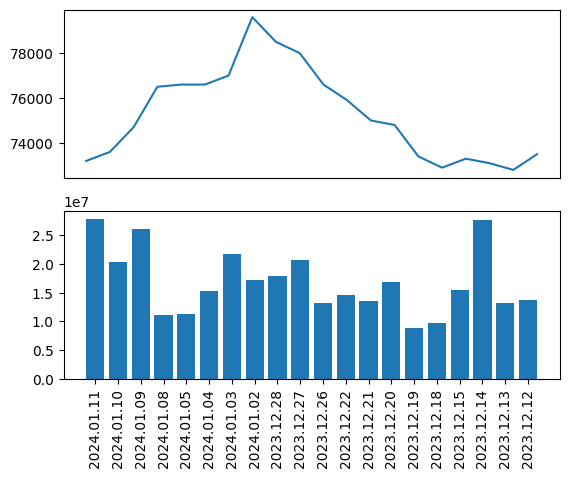

In [66]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(stock_quotes_df["date"], stock_quotes_df['end'])
axes[1].bar(stock_quotes_df['date'], stock_quotes_df["volume"])
axes[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
plt.xticks(rotation=90)
plt.show()

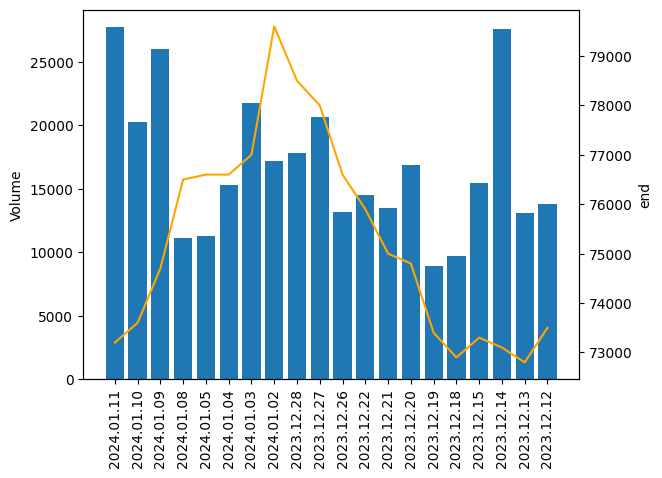

In [80]:
ax = plt.gca()
ax.bar(stock_quotes_df['date'], stock_quotes_df["volume"]/1000)
ax.set_ylabel("Volume")
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(stock_quotes_df["date"], stock_quotes_df['end'], color='orange')
ax2.stock_quotes_df("end")
plt.show()